In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance

In [2]:
start_date = '2016-02-01'
end_date = '2019-12-31'

In [3]:
data = yfinance.download("AUDUSD=X CADUSD=X CHFUSD=X \
                          CNYUSD=X DKKUSD=X EURUSD=X \
                          GBPUSD=X HKDUSD=X JPYUSD=X \
                          KZTUSD=X NOKUSD=X NZDUSD=X \
                          PLNUSD=X RUBUSD=X SEKUSD=X",
                        start=start_date, end=end_date)

[*********************100%***********************]  15 of 15 completed


In [4]:
data['Close'].head()

AUDUSD=X  CADUSD=X  CHFUSD=X  CNYUSD=X  DKKUSD=X  EURUSD=X  \
Date                                                                     
2016-02-01  0.706864  0.715676  0.976086  0.152297  0.145087  1.082591   
2016-02-02  0.711086  0.716846  0.980873  0.152244  0.146036  1.089728   
2016-02-03  0.702988  0.711238  0.981653  0.152212  0.146354  1.092204   
2016-02-04  0.715461  0.724942  0.994827  0.152277  0.148637  1.109102   
2016-02-05  0.719942  0.726998  1.006654  0.152560  0.150071  1.119996   

            GBPUSD=X  HKDUSD=X  JPYUSD=X  KZTUSD=X  NOKUSD=X  NZDUSD=X  \
Date                                                                     
2016-02-01  1.424603  0.128481  0.008241  0.002743  0.115135  0.646998   
2016-02-02  1.442793  0.128553  0.008275  0.002805  0.115201  0.654579   
2016-02-03  1.440922  0.128317  0.008343  0.002683  0.114683  0.652018   
2016-02-04  1.458576  0.128345  0.008466  0.002762  0.116773  0.664717   
2016-02-05  1.458109  0.128403  0.008557  0.002772  0.117701  0.672993   

            PLNUSD=X  RUBUSD=X  SEKUSD=X  
Date                                      
2016-02-01  0.245228  0.013256  0.116426  
2016-02-02  0.247986  0.012943  0.117306  
2016-02-03  0.248004  0.012545  0.116964  
2016-02-04  0.251062  0.012999  0.118491  
2016-02-05  0.253291  0.013026  0.119067

In [5]:
new_data = data['Close'].interpolate(method='polynomial', order=3)

In [6]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN

Using TensorFlow backend.
C:\Users\Aleksei_Shimko\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Aleksei_Shimko\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Aleksei_Shimko\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint1

In [7]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [8]:
# new_data['day'] = new_data.index.day
# new_data['month'] = new_data.index.month

In [9]:
values = new_data.values

In [10]:
values

array([[ 0.70686364,  0.71567619,  0.9760859 , ...,  0.11642582,
         1.        ,  2.        ],
       [ 0.71108586,  0.71684587,  0.98087299, ...,  0.11730605,
         2.        ,  2.        ],
       [ 0.70298767,  0.71123755,  0.98165292, ...,  0.1169644 ,
         3.        ,  2.        ],
       ...,
       [ 0.69247282,  0.76016724,  1.02103329, ...,  0.10641468,
        26.        , 12.        ],
       [ 0.69463742,  0.7628929 ,  1.01887989, ...,  0.10633377,
        27.        , 12.        ],
       [ 0.69829965,  0.76491195,  1.02699983, ...,  0.10722665,
        30.        , 12.        ]])

In [11]:
values.shape

(1018, 17)

In [12]:
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [13]:
scaled

array([[0.25593185, 0.0386939 , 0.0439291 , ..., 0.5885236 , 0.        ,
        0.09090909],
       [0.28590202, 0.04889107, 0.0861063 , ..., 0.62116647, 0.03333334,
        0.09090909],
       [0.2284193 , 0.        , 0.09297752, ..., 0.6084964 , 0.06666668,
        0.09090909],
       ...,
       [0.15378284, 0.42654943, 0.43994617, ..., 0.21726441, 0.8333334 ,
        1.        ],
       [0.16914749, 0.4503107 , 0.42097282, ..., 0.21426368, 0.8666667 ,
        1.        ],
       [0.19514275, 0.46791172, 0.4925146 , ..., 0.24737573, 0.96666664,
        1.        ]], dtype=float32)

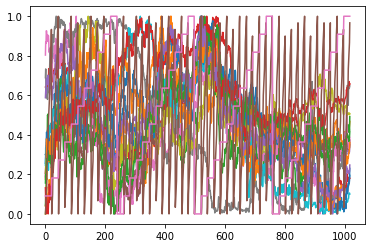

In [14]:
plt.plot(scaled)
plt.show()

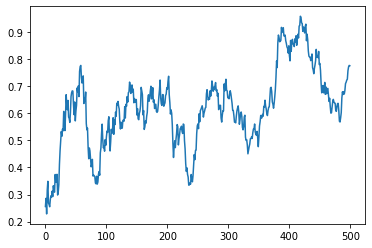

In [39]:
plt.plot(scaled[:,0][0:500])

In [40]:
# specify the number of lag hours
n_hours = 30
n_features = scaled.shape[1]
n_predict = 1
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, n_predict)
print(reframed.shape)

(988, 527)


In [41]:
reframed.head()

var1(t-30)  var2(t-30)  var3(t-30)  var4(t-30)  var5(t-30)  var6(t-30)  \
30    0.255932    0.038694    0.043929    0.641567    0.187778    0.205439   
31    0.285902    0.048891    0.086106    0.638932    0.221347    0.239113   
32    0.228419    0.000000    0.092978    0.637329    0.232592    0.250793   
33    0.316959    0.119473    0.209049    0.640536    0.313314    0.330521   
34    0.348768    0.137392    0.313253    0.654541    0.363995    0.381919   

    var7(t-30)  var8(t-30)  var9(t-30)  var10(t-30)  ...   var8(t)   var9(t)  \
30    0.803655    0.689125    0.000000     0.245129  ...  0.936050  0.309790   
31    0.869385    0.733315    0.019286     0.334864  ...  0.947472  0.307518   
32    0.862624    0.586983    0.057711     0.157589  ...  0.935738  0.339367   
33    0.926417    0.604622    0.127063     0.272308  ...  0.943565  0.355022   
34    0.924726    0.640358    0.178442     0.287877  ...  0.968369  0.418180   

    var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  var16(t)  \
30  0.530291  0.467610  0.387571  0.382652  0.325136  0.720021  0.433333   
31  0.525152  0.430639  0.343972  0.372731  0.311849  0.714828  0.466667   
32  0.508194  0.380462  0.287406  0.364054  0.281301  0.729730  0.500000   
33  0.500632  0.444308  0.387571  0.404894  0.327771  0.775615  0.533333   
34  0.473091  0.525169  0.464190  0.451275  0.394043  0.804267  0.566667   

    var17(t)  
30  0.181818  
31  0.181818  
32  0.181818  
33  0.181818  
34  0.181818  

[5 rows x 527 columns]

In [42]:
# split into train and test sets
values = reframed.values
n_train_hours = 500
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

In [43]:
# split into input and outputs
n_obs = n_hours * n_features

In [44]:
train_X, train_y = train[:, :n_obs], train[:, n_obs:]
test_X, test_y = test[:, :n_obs], test[:, n_obs:]
print(train_X.shape, train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(500, 510) (500, 17)
(500, 30, 17) (500, 17) (488, 30, 17) (488, 17)


In [45]:
train_X[0]

array([[0.25593185, 0.0386939 , 0.0439291 , 0.64156723, 0.18777752,
        0.20543861, 0.8036547 , 0.68912506, 0.        , 0.24512935,
        0.30025148, 0.1762433 , 0.15635943, 0.1321969 , 0.5885236 ,
        0.        , 0.09090909],
       [0.28590202, 0.04889107, 0.0861063 , 0.63893175, 0.22134686,
        0.23911333, 0.86938477, 0.7333145 , 0.01928616, 0.3348639 ,
        0.30319977, 0.23539543, 0.19794154, 0.07479477, 0.62116647,
        0.03333334, 0.09090909],
       [0.2284193 , 0.        , 0.09297752, 0.6373286 , 0.23259163,
        0.25079298, 0.8626237 , 0.5869827 , 0.05771112, 0.15758896,
        0.28015852, 0.21541405, 0.19821048, 0.00151777, 0.6084964 ,
        0.06666668, 0.09090909],
       [0.3169589 , 0.1194725 , 0.20904922, 0.64053583, 0.31331444,
        0.33052063, 0.9264169 , 0.6046219 , 0.1270628 , 0.27230763,
        0.37307405, 0.31450033, 0.24432397, 0.08500123, 0.66509414,
        0.10000001, 0.09090909],
       [0.34876776, 0.13739157, 0.3132534 , 0.654541

In [46]:
train_y[0]

array([0.6069503 , 0.38614464, 0.40973663, 0.7353339 , 0.35148287,
       0.36681175, 0.8520665 , 0.9360504 , 0.30978966, 0.5302913 ,
       0.46760988, 0.38757133, 0.3826518 , 0.3251357 , 0.72002053,
       0.43333337, 0.18181819], dtype=float32)

In [47]:
values[:,0][0:n_hours+n_predict]

array([0.25593185, 0.28590202, 0.2284193 , 0.3169589 , 0.34876776,
       0.26837587, 0.26339102, 0.25486803, 0.28088236, 0.2952509 ,
       0.29021263, 0.31223917, 0.2923708 , 0.33226538, 0.31369066,
       0.30861568, 0.37390852, 0.3461938 , 0.3454585 , 0.3746519 ,
       0.2981348 , 0.30861568, 0.33628893, 0.41171074, 0.46119356,
       0.49924374, 0.5324764 , 0.51516104, 0.5415735 , 0.5352416 ,
       0.6069503 ], dtype=float32)

Train on 500 samples, validate on 488 samples
Epoch 1/100
 - 4s - loss: 0.2603 - val_loss: 0.1614
Epoch 2/100
 - 1s - loss: 0.1803 - val_loss: 0.1170
Epoch 3/100
 - 1s - loss: 0.1240 - val_loss: 0.1003
Epoch 4/100
 - 1s - loss: 0.1021 - val_loss: 0.0983
Epoch 5/100
 - 1s - loss: 0.0905 - val_loss: 0.0904
Epoch 6/100
 - 1s - loss: 0.0709 - val_loss: 0.0712
Epoch 7/100
 - 1s - loss: 0.0563 - val_loss: 0.0628
Epoch 8/100
 - 1s - loss: 0.0529 - val_loss: 0.0599
Epoch 9/100
 - 1s - loss: 0.0490 - val_loss: 0.0565
Epoch 10/100
 - 1s - loss: 0.0363 - val_loss: 0.0491
Epoch 11/100
 - 1s - loss: 0.0289 - val_loss: 0.0484
Epoch 12/100
 - 1s - loss: 0.0291 - val_loss: 0.0461
Epoch 13/100
 - 1s - loss: 0.0273 - val_loss: 0.0448
Epoch 14/100
 - 1s - loss: 0.0239 - val_loss: 0.0380
Epoch 15/100
 - 1s - loss: 0.0136 - val_loss: 0.0269
Epoch 16/100
 - 1s - loss: 0.0128 - val_loss: 0.0249
Epoch 17/100
 - 1s - loss: 0.0127 - val_loss: 0.0254
Epoch 18/100
 - 1s - loss: 0.0105 - val_loss: 0.0246
Epoch 19/

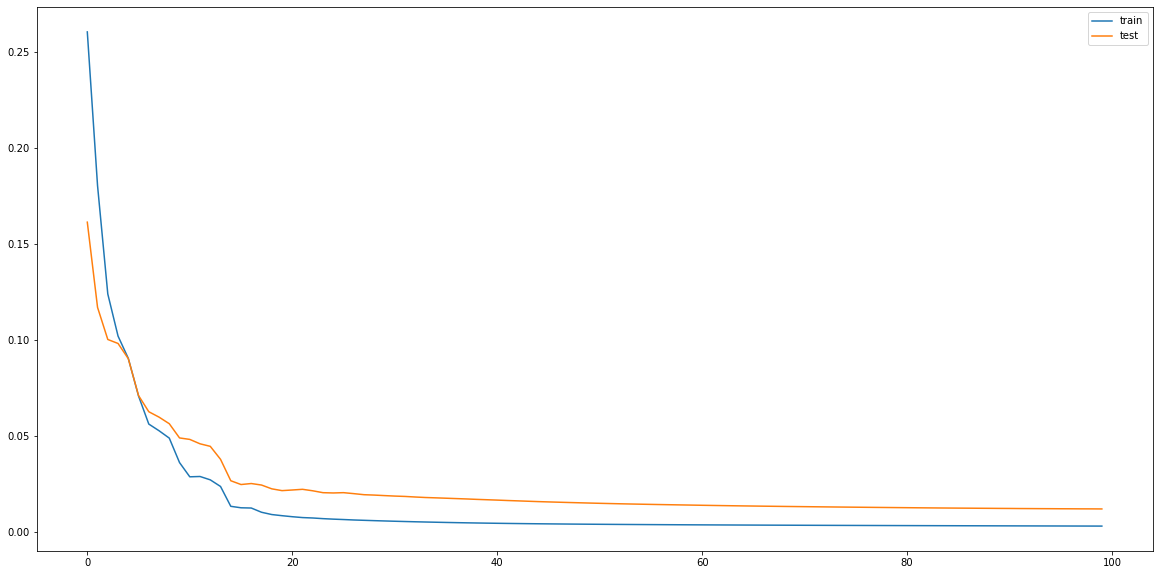

In [80]:
# design network
model = Sequential()
model.add(GRU(128, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(GRU(128, return_sequences=False))
model.add(Dense(train_y.shape[1], activation='relu'))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=128, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
fig, ax = plt.subplots(figsize=(20,10))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [85]:
n_features

17

In [99]:
y_pred = scaler.inverse_transform(model.predict(test_X))
y_true = scaler.inverse_transform(test_y)

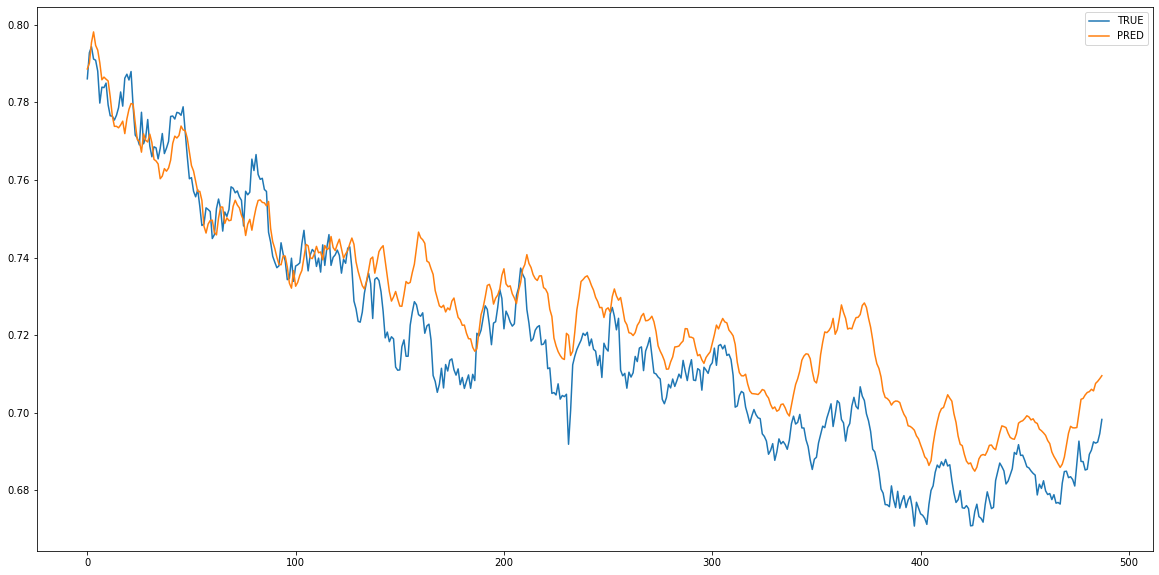

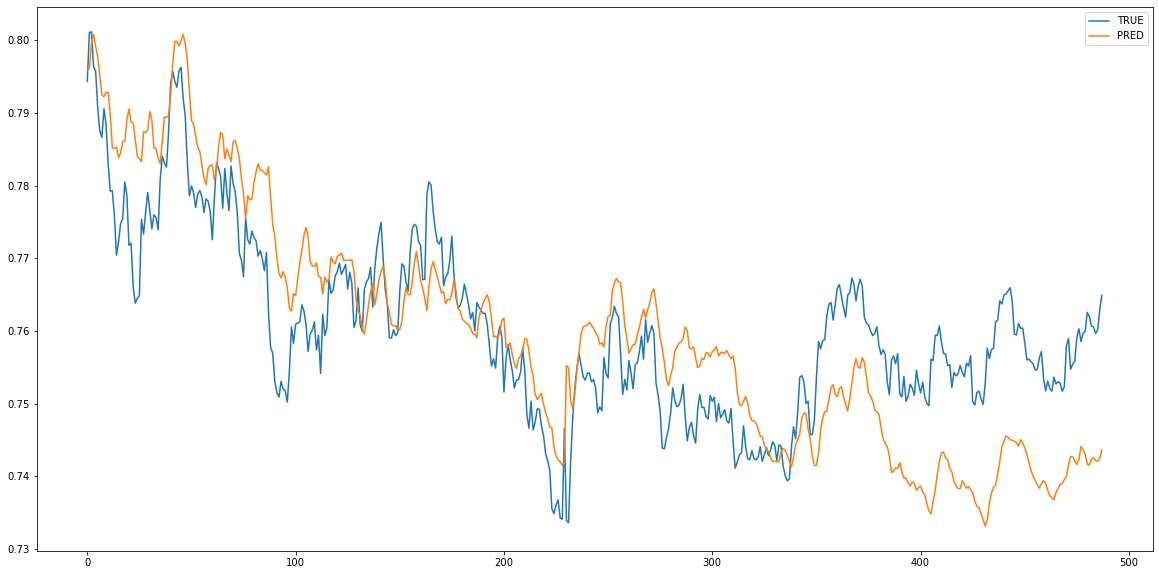

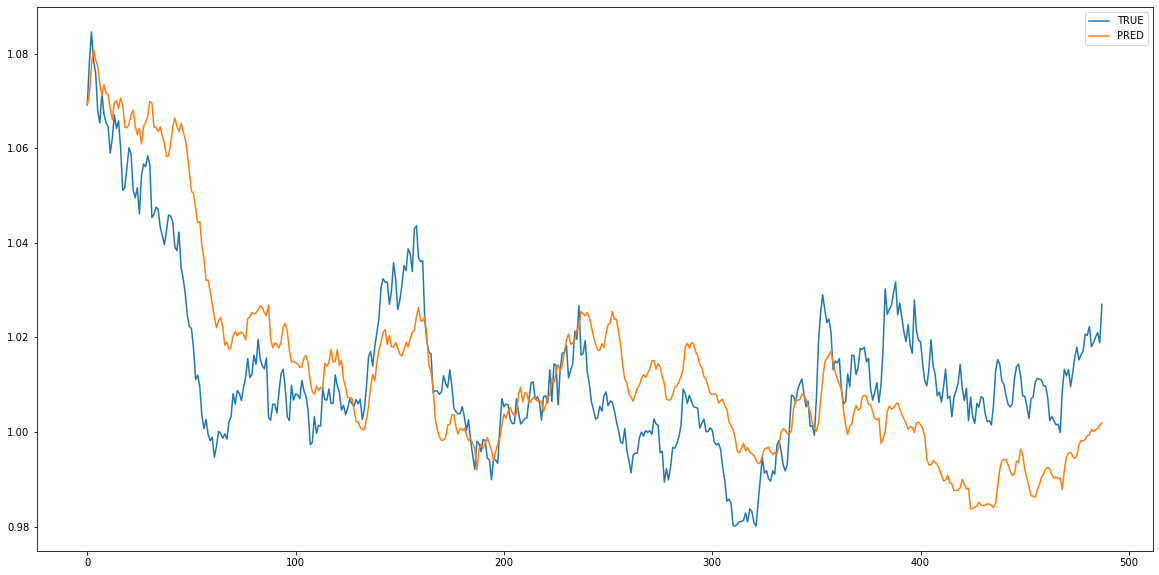

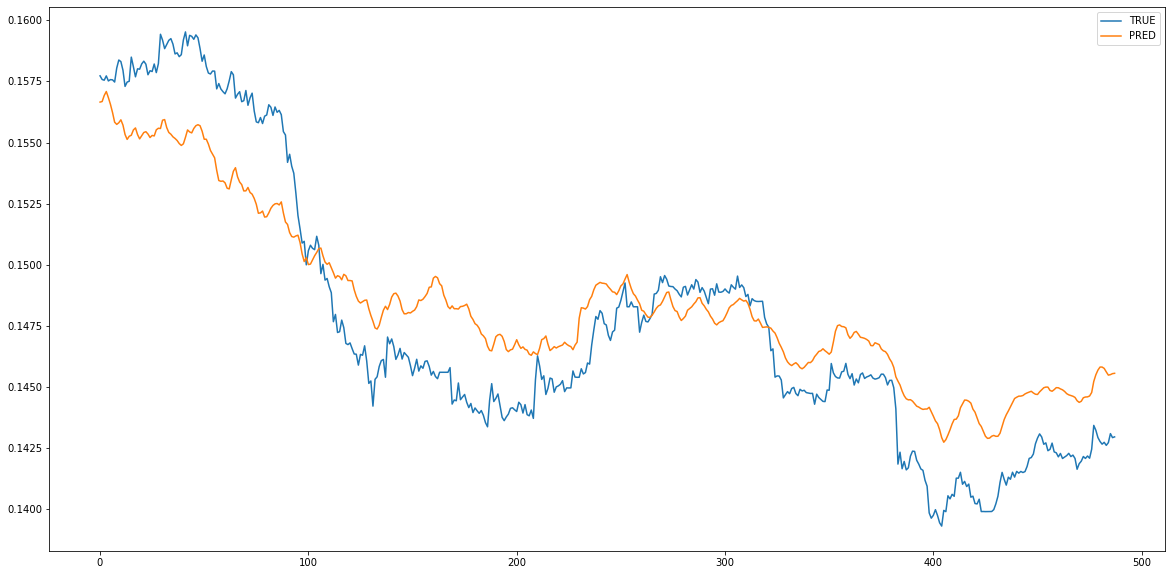

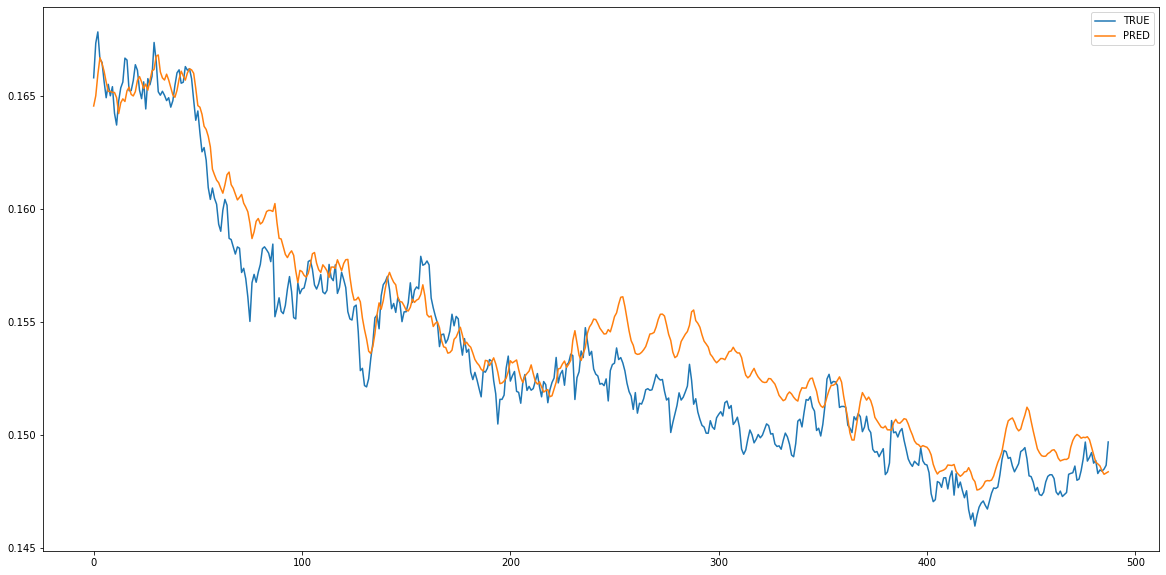

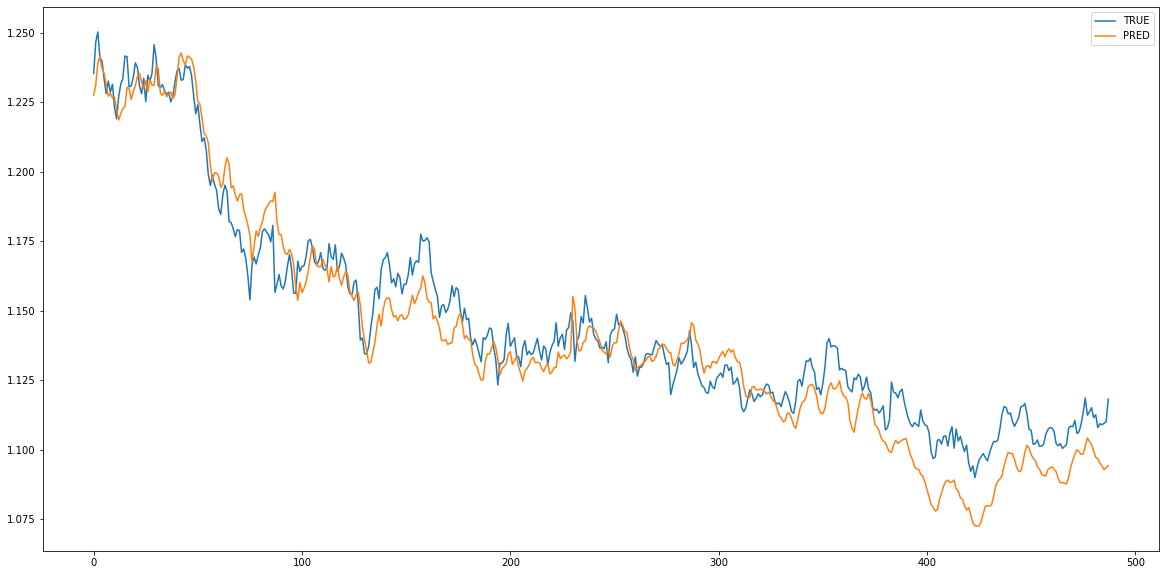

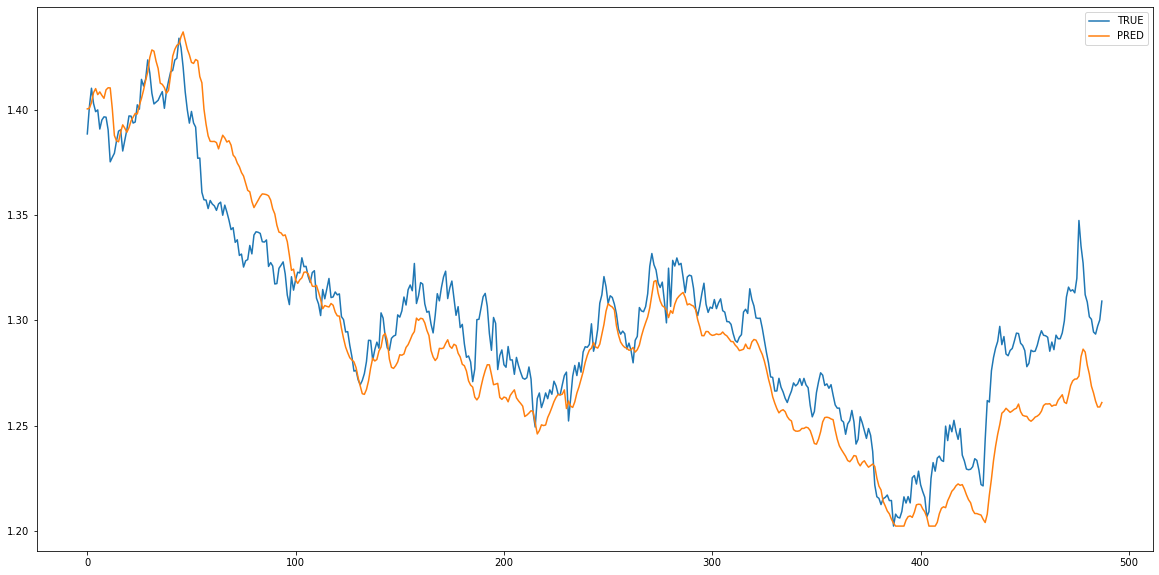

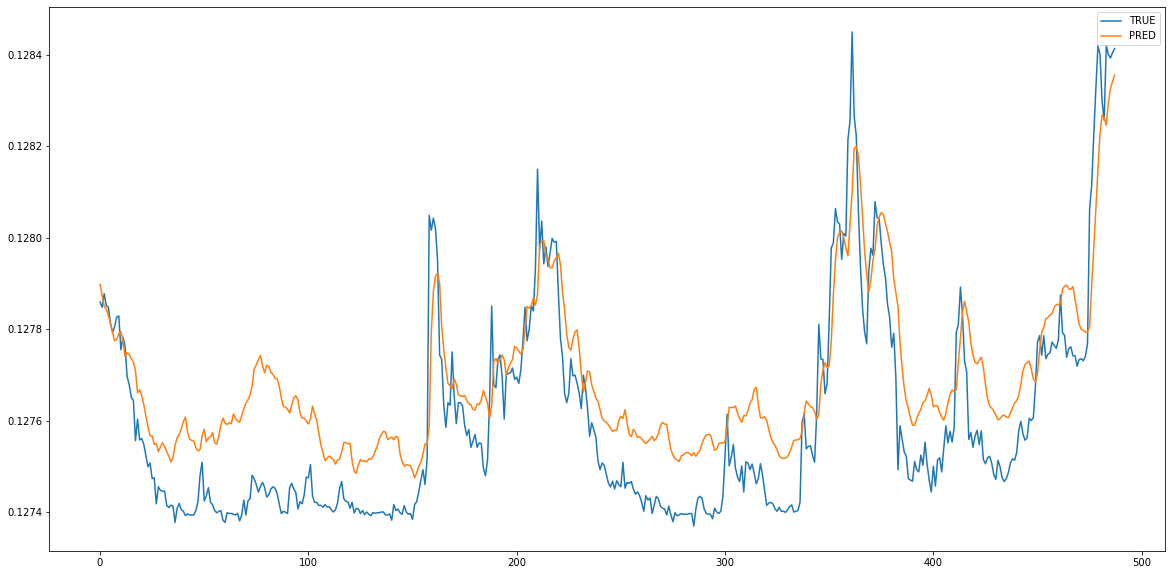

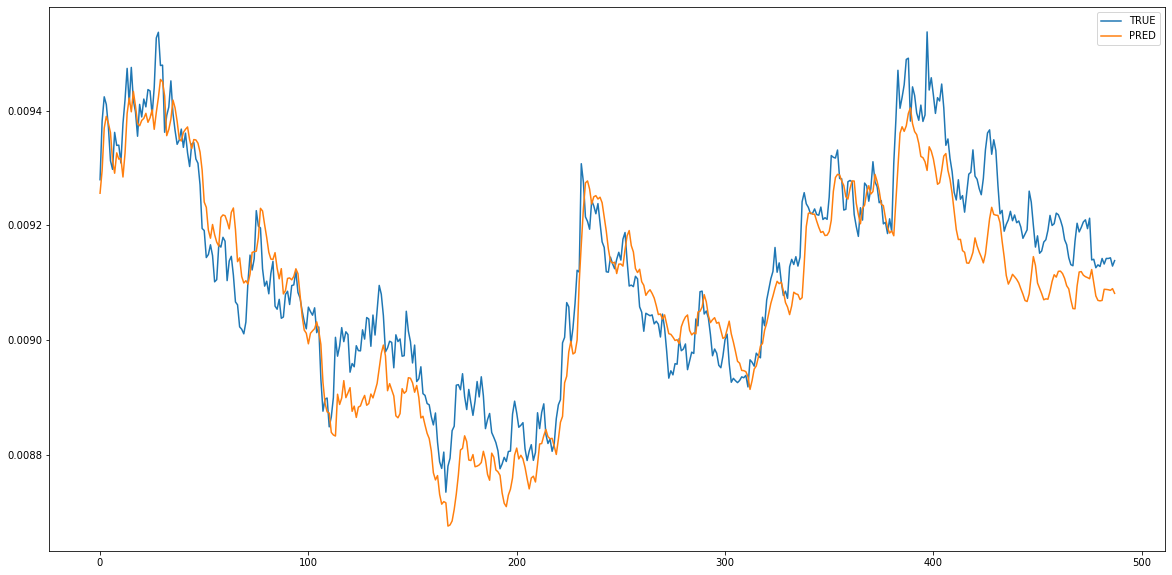

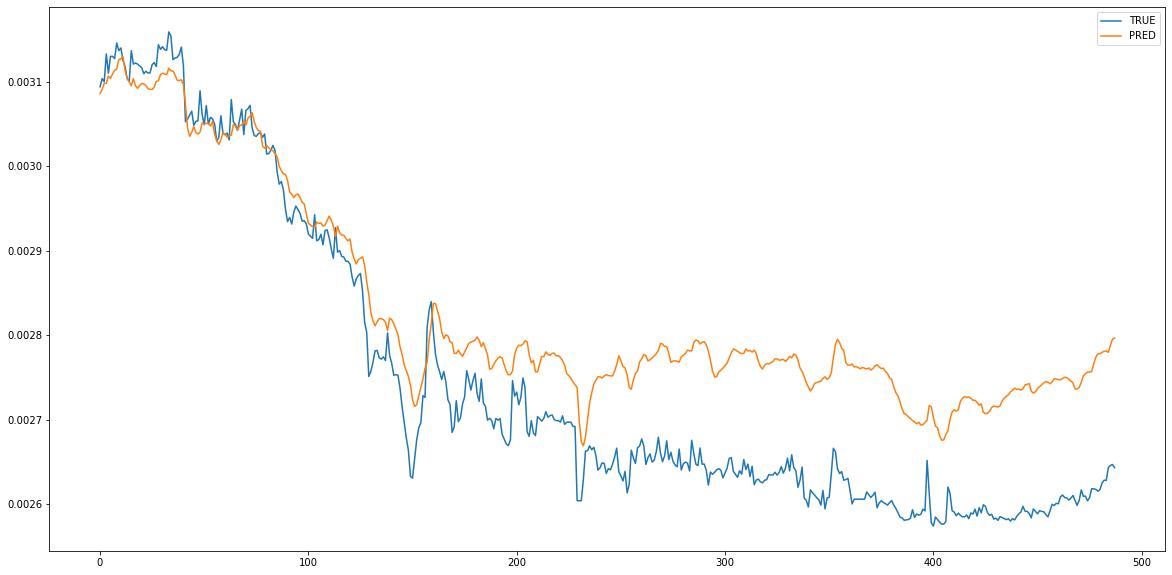

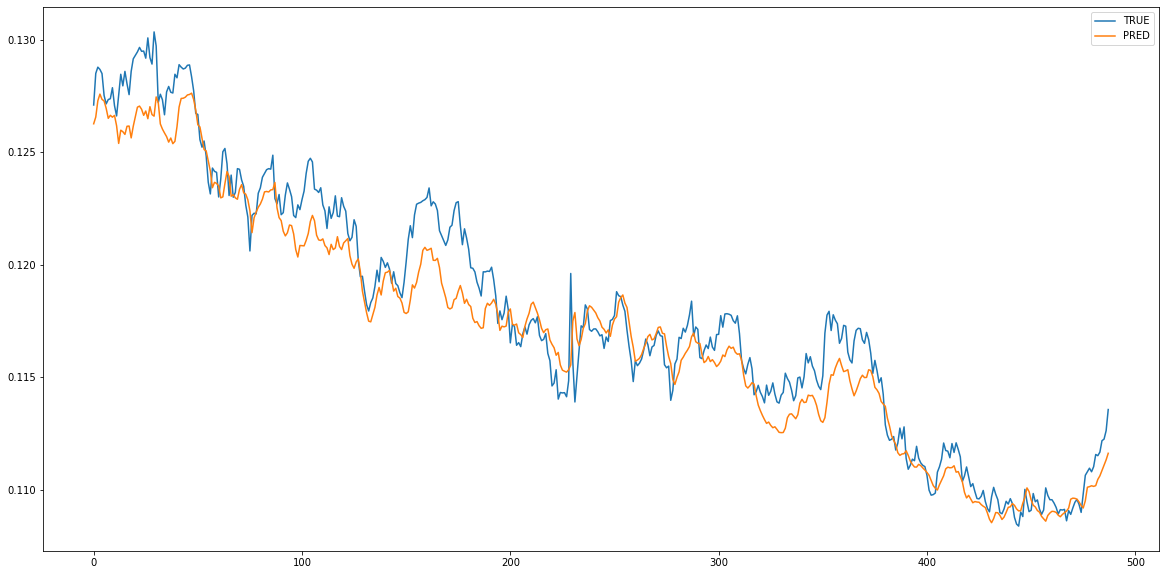

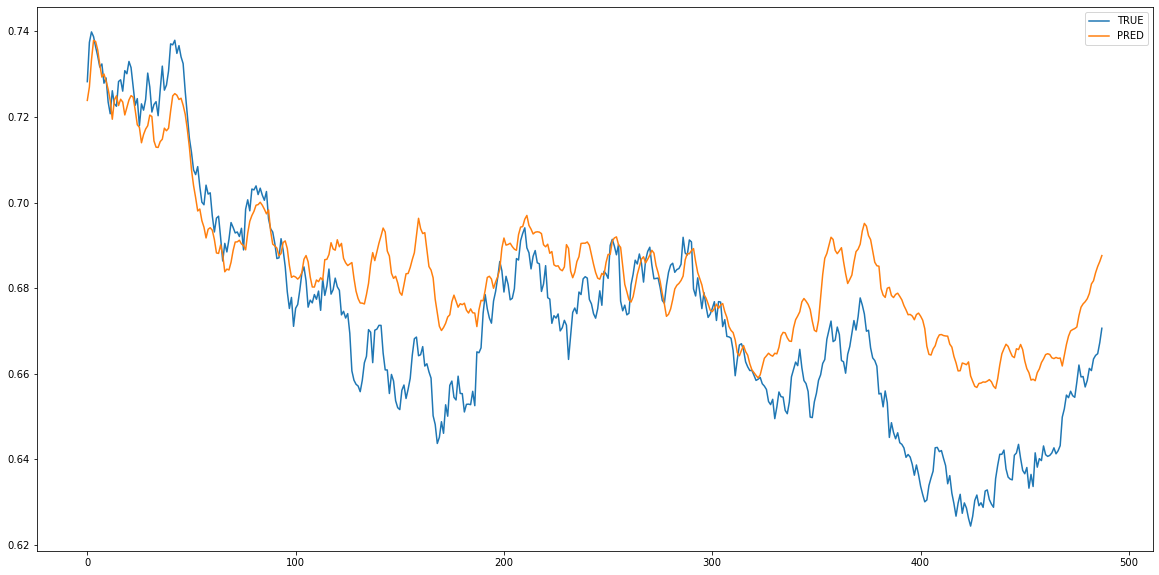

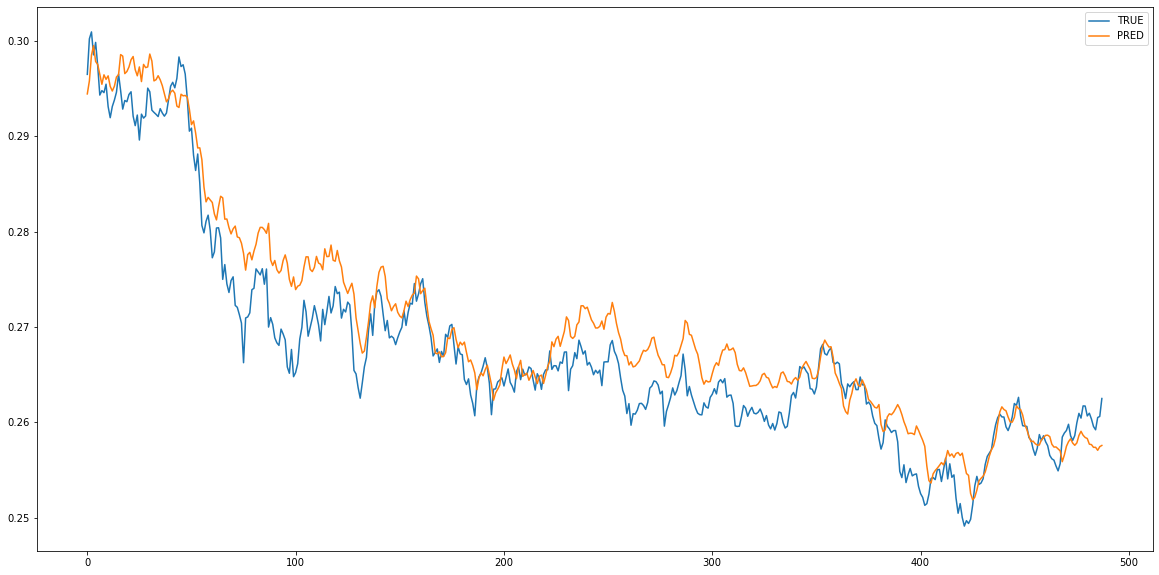

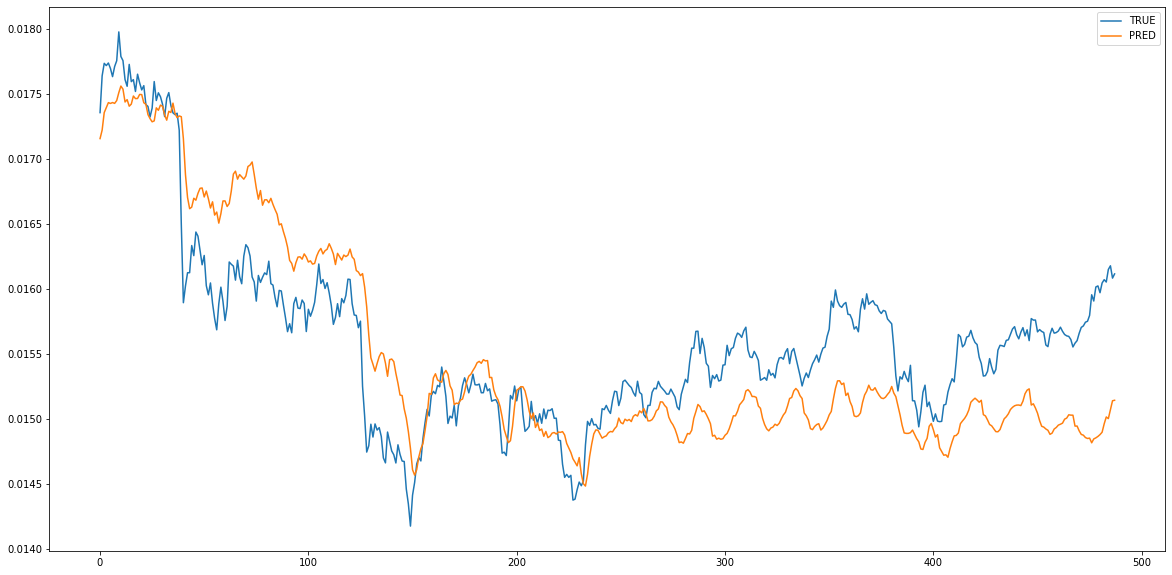

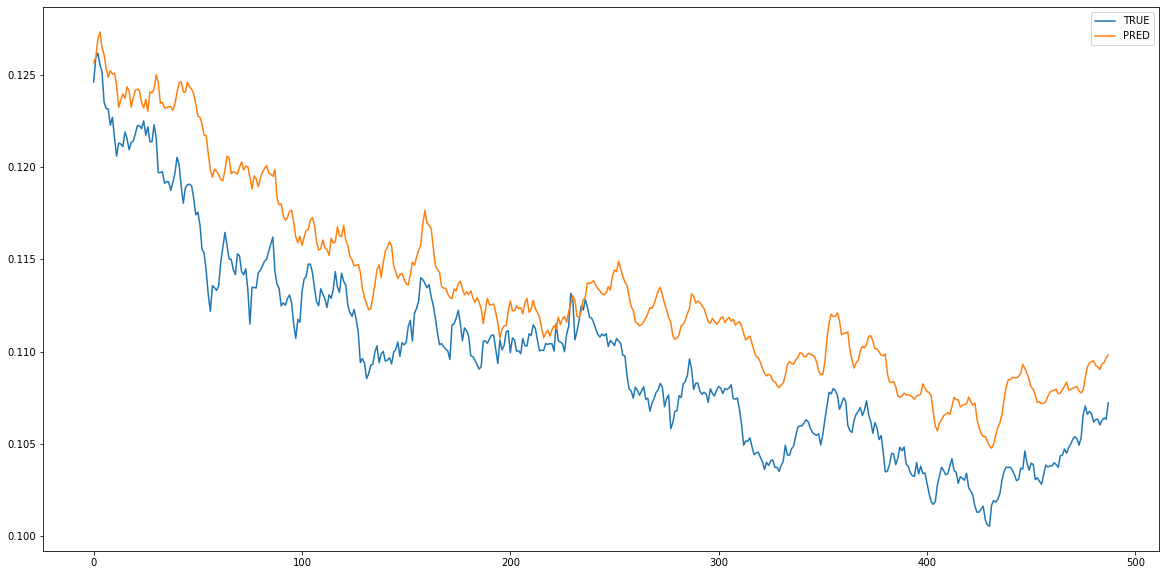

In [101]:
for i in range(15):
    pd.DataFrame({'TRUE': y_true[:, i],
                  'PRED': y_pred[:, i]}).plot(figsize=(20,10))

In [81]:
def predict(start_arr, dist):
    res = np.array(start_arr)[:,0:n_features]
    
    for i in range(dist):
        pred = model.predict(np.array([res[-n_hours:]])).reshape(n_predict,n_features)
        res = np.concatenate((res, pred))
        if len(res) > dist + len(start_arr):
            break
    
    return res

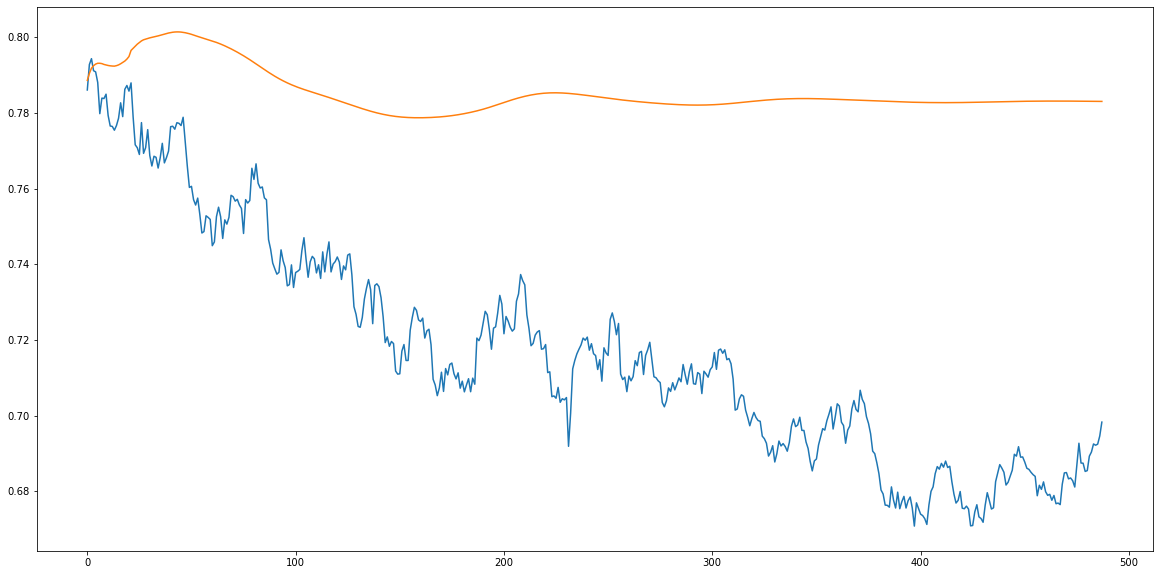

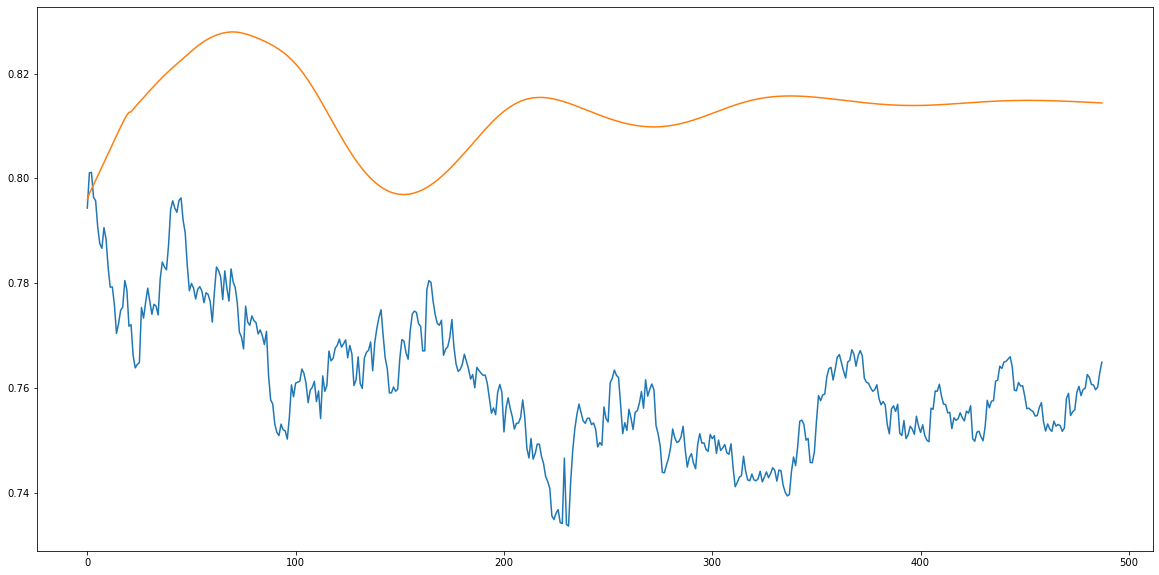

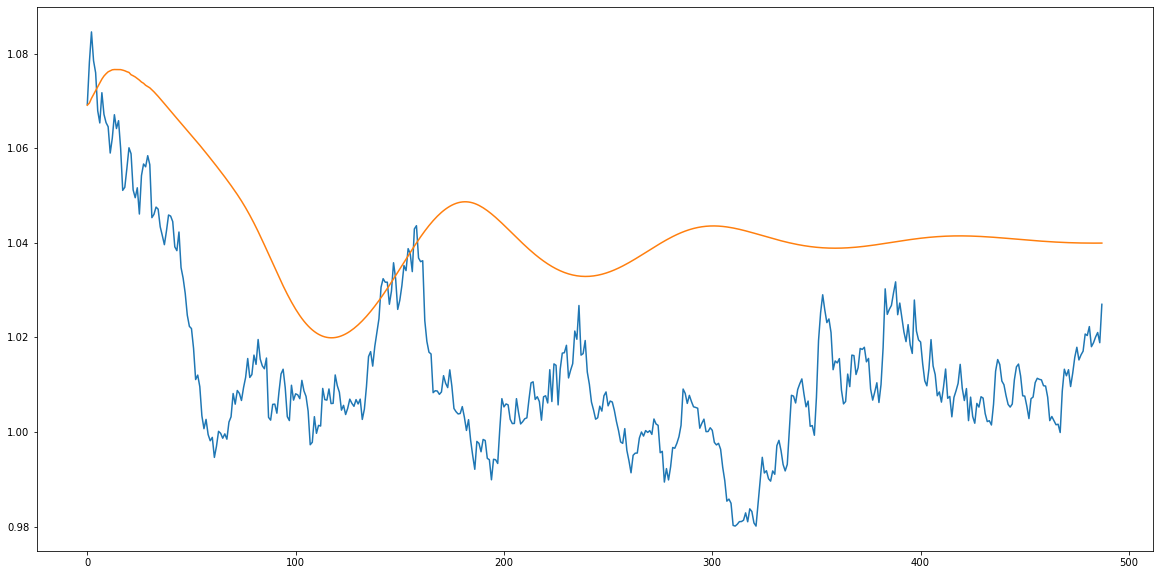

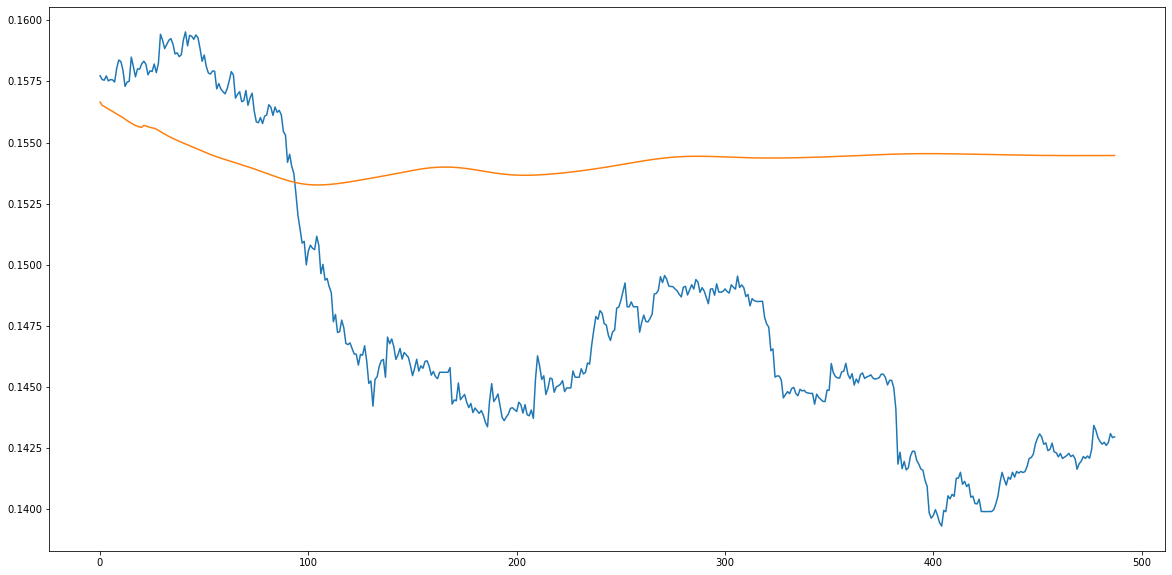

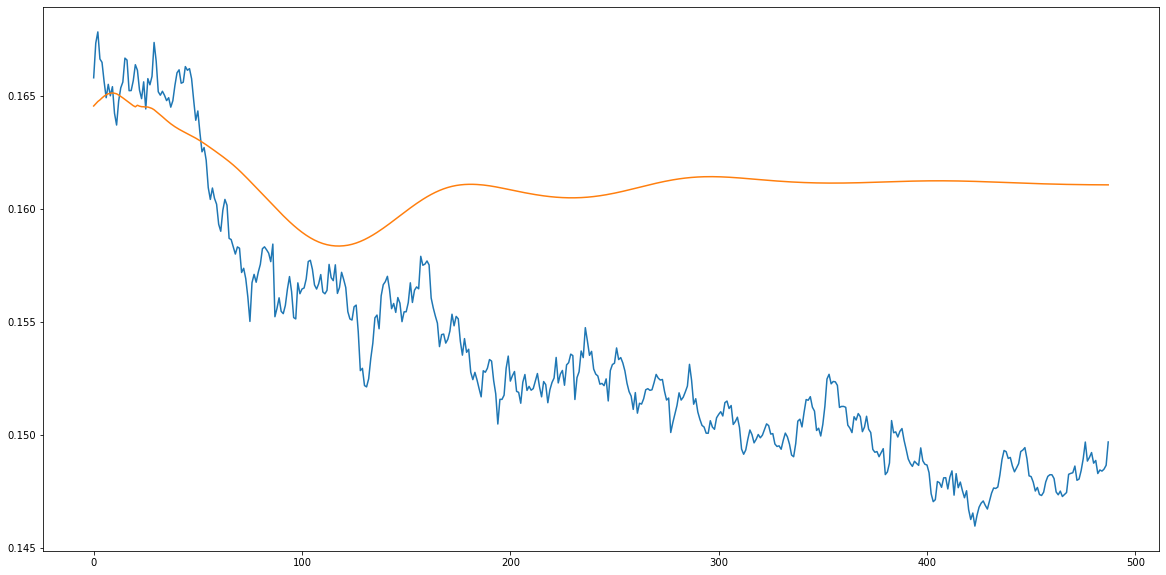

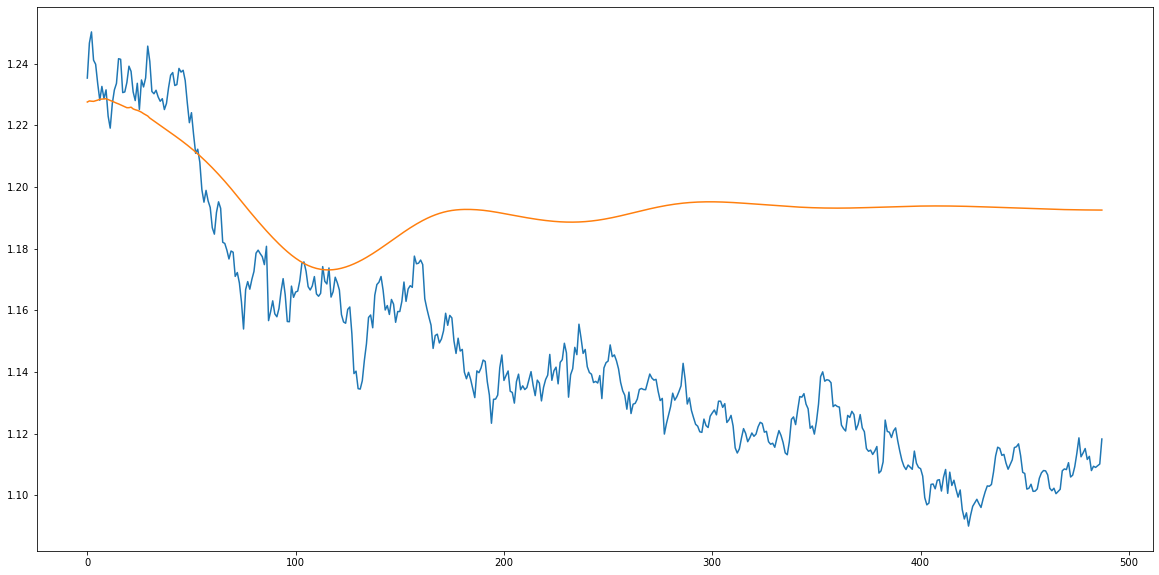

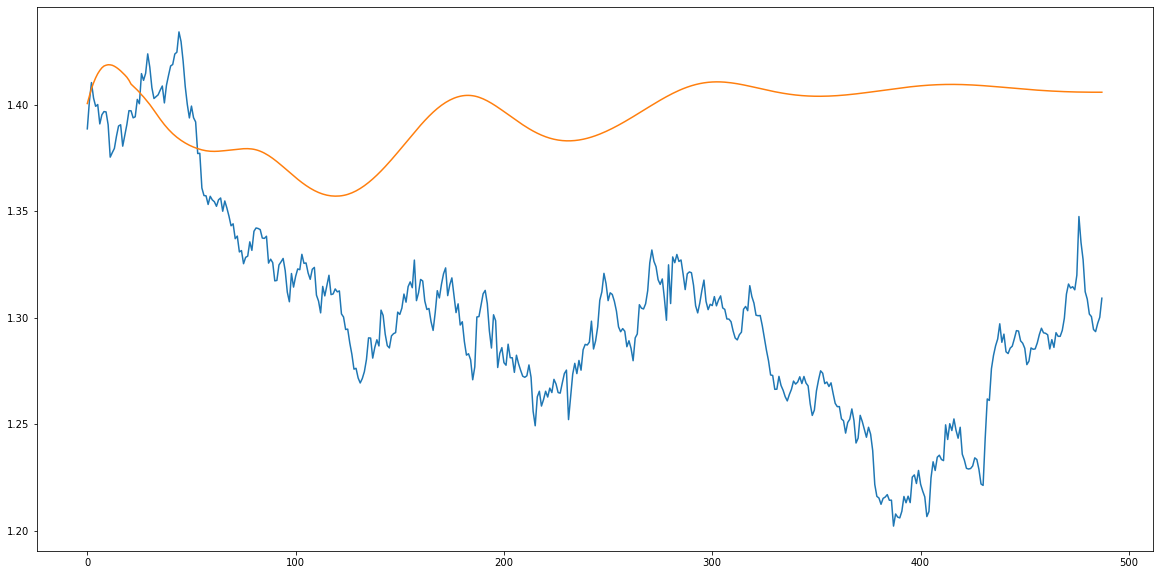

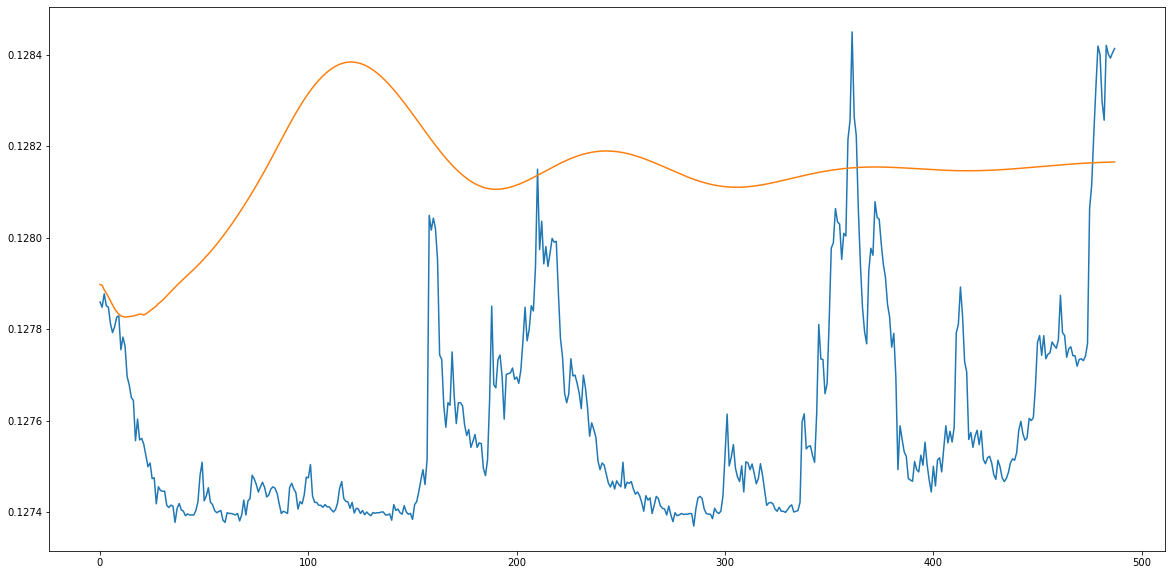

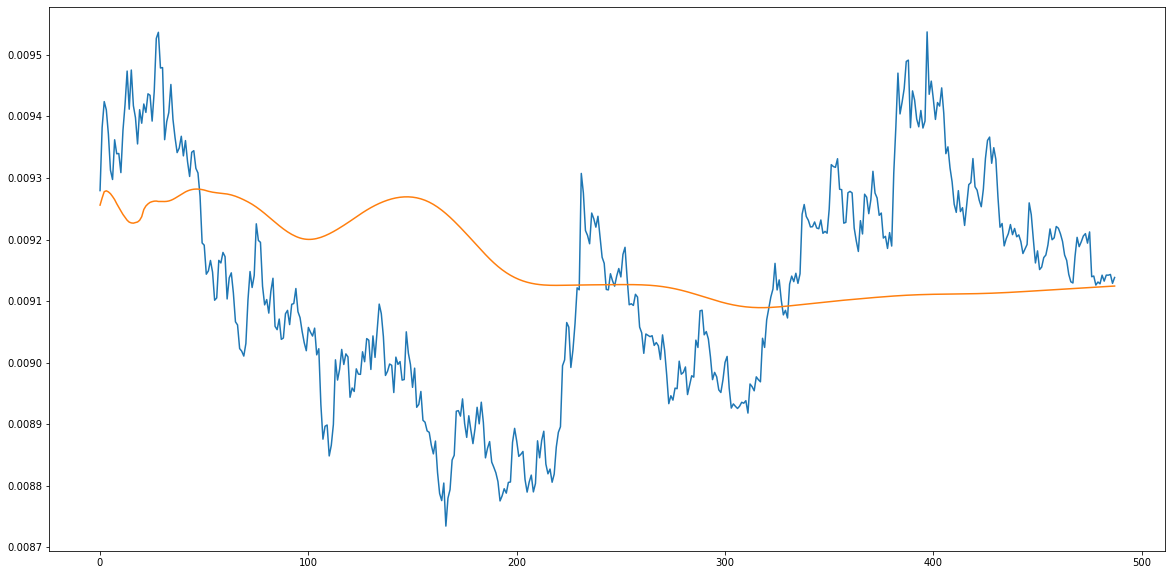

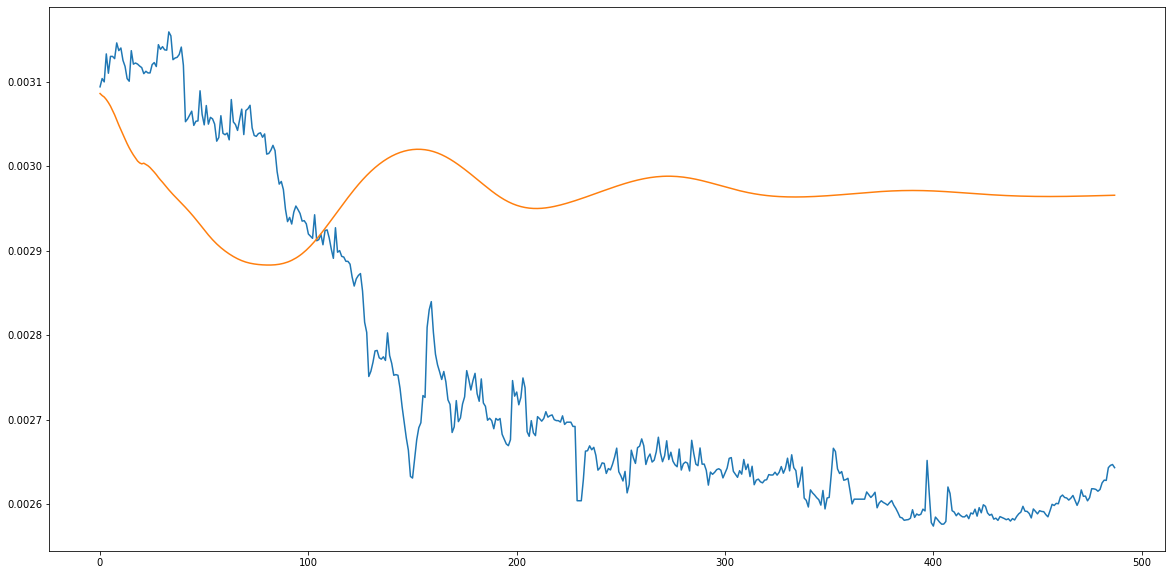

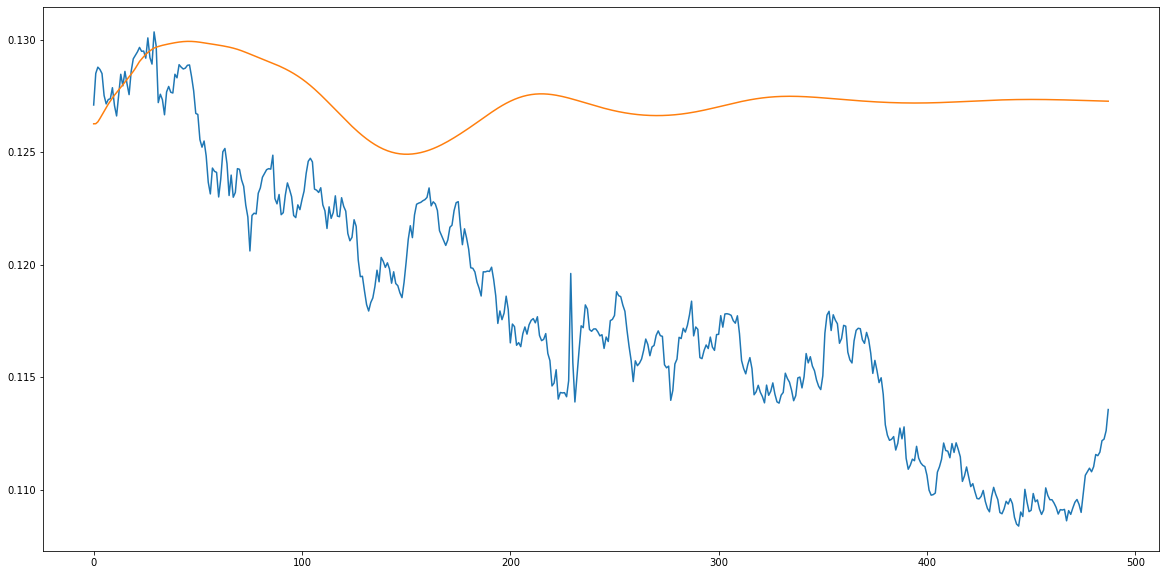

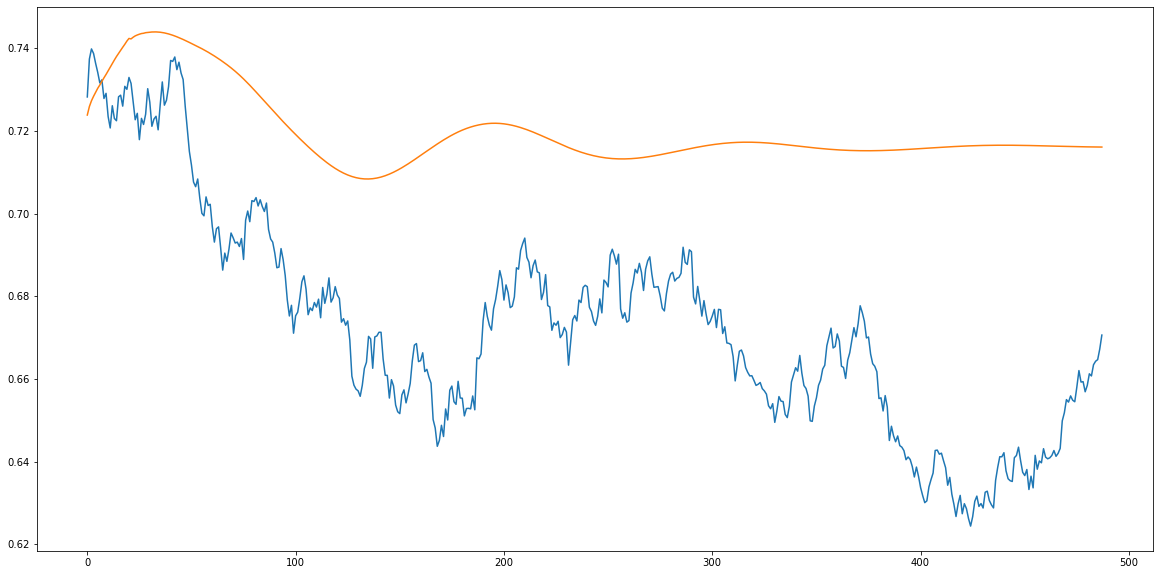

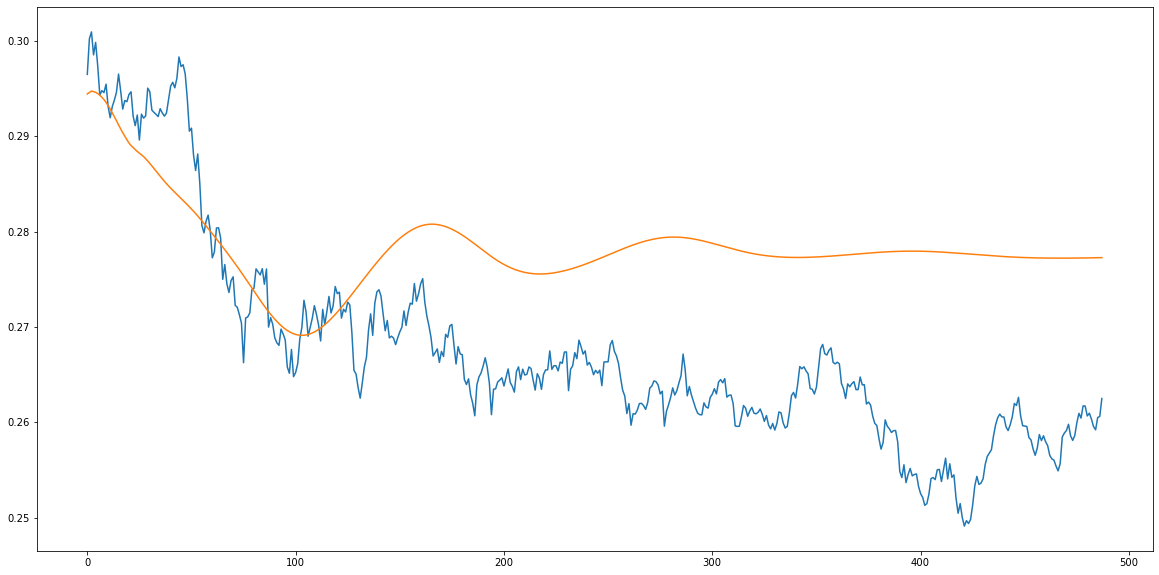

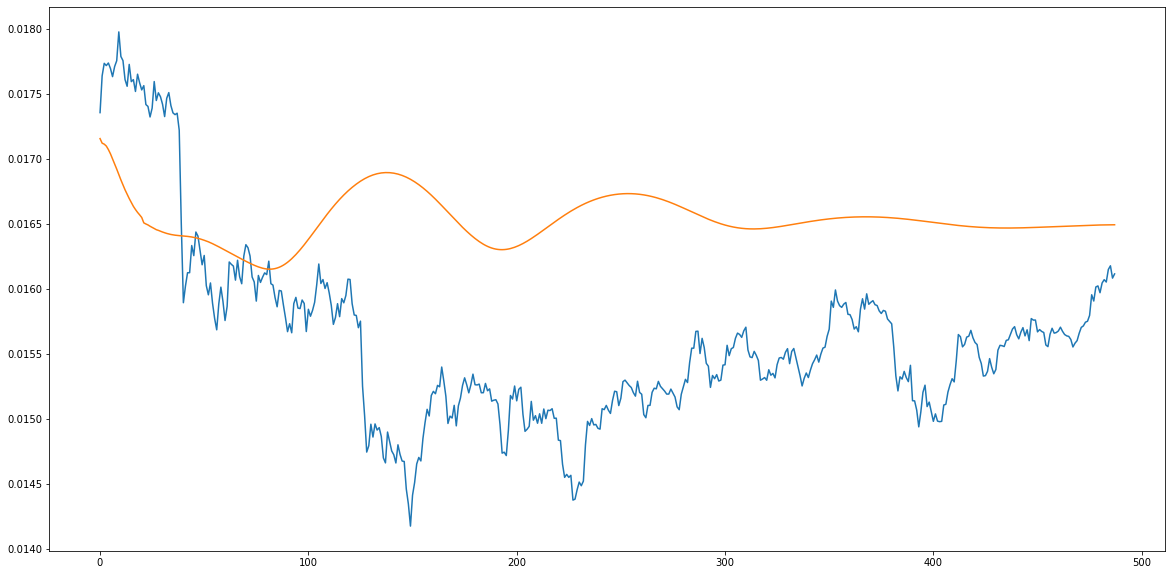

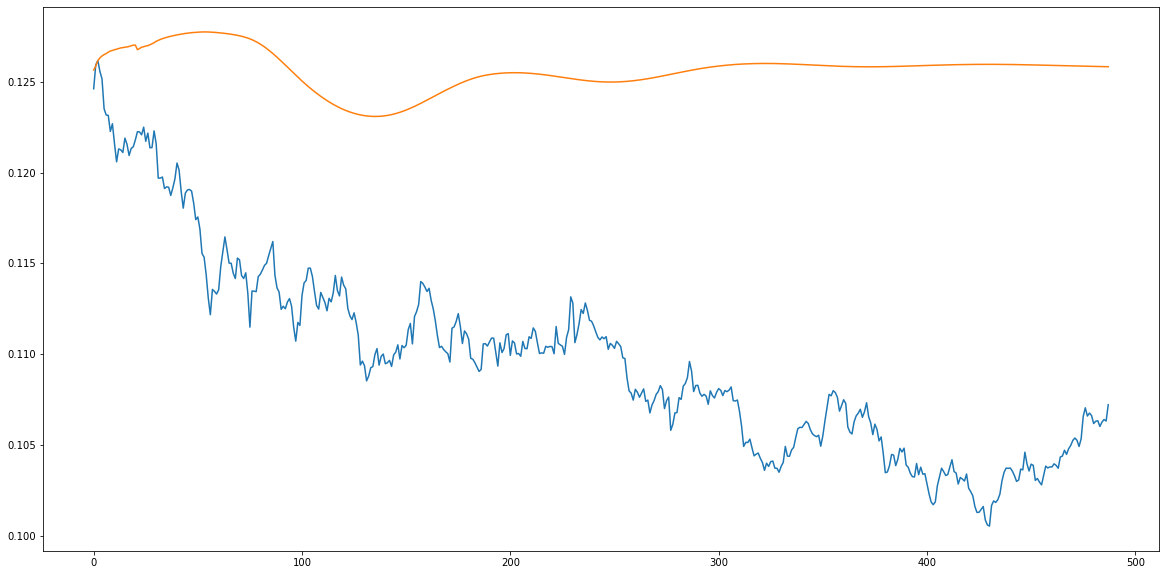

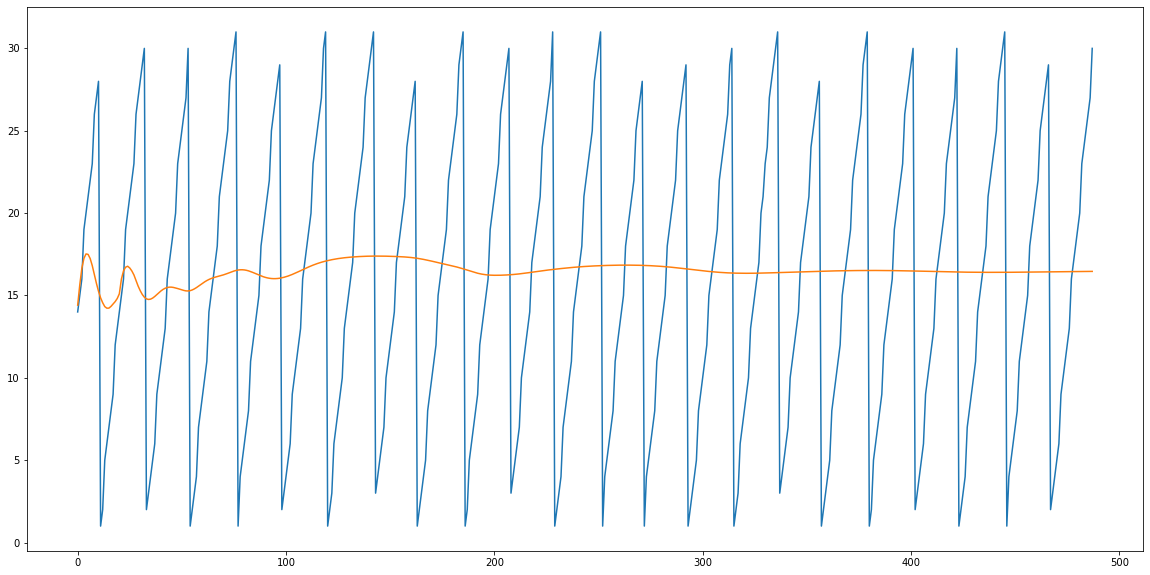

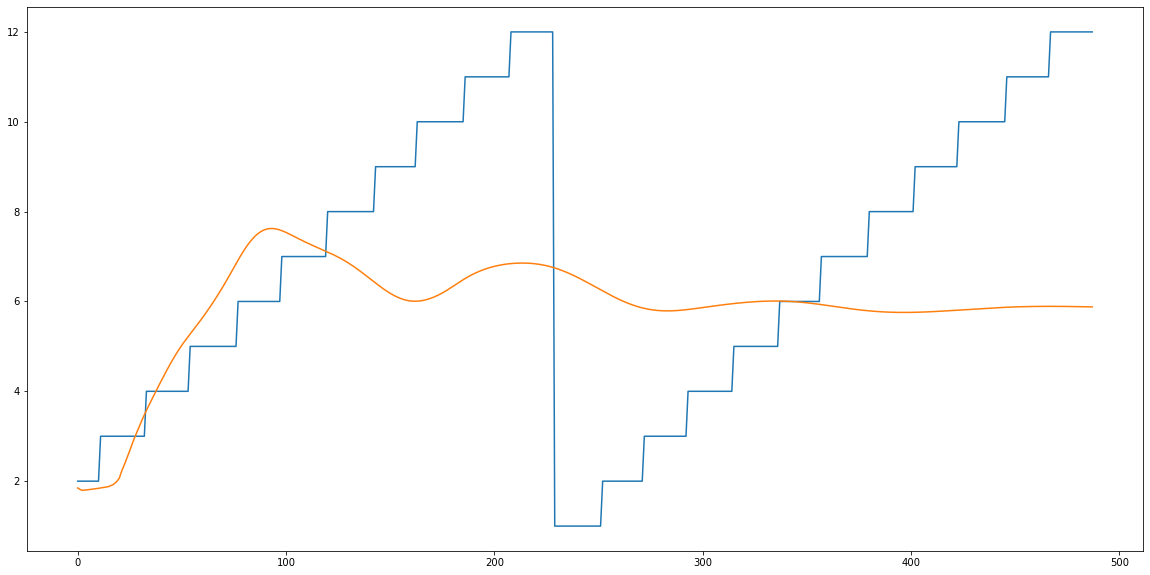

In [82]:
for i in range(n_features):
    fig, ax = plt.subplots(figsize=(20,10))
    plt.plot(scaler.inverse_transform(test_y[:,0:n_features])[:,i])
    plt.plot(scaler.inverse_transform(predict(train_y, len(test_y))[500:500+len(test_y)])[:,i])
    plt.show()

In [64]:
train_y[:,0:n_features][-1]

array([0.81706524, 0.7310982 , 0.83199215, 0.92659616, 0.9002433 ,
       0.90268946, 0.6613941 , 0.32091522, 0.54248667, 0.71871114,
       0.80399084, 0.79502726, 0.9099939 , 0.8785498 , 0.8759854 ,
       0.40000004, 0.09090909], dtype=float32)

In [65]:
train_y[:,n_features:][-1]

array([], dtype=float32)

In [66]:
test_y[:,0:n_features][0]

array([0.8183813 , 0.7244911 , 0.8648176 , 0.90996313, 0.9203243 ,
       0.9262829 , 0.6739063 , 0.30369568, 0.58720064, 0.7551248 ,
       0.8320441 , 0.81038046, 0.9291289 , 0.88591385, 0.8917711 ,
       0.43333337, 0.09090909], dtype=float32)

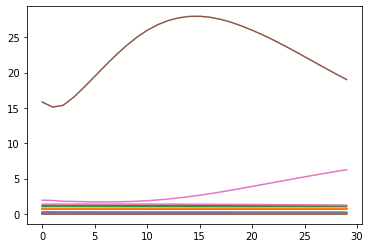

In [67]:
plt.plot(scaler.inverse_transform(predict(train_y, 30)[500:]))

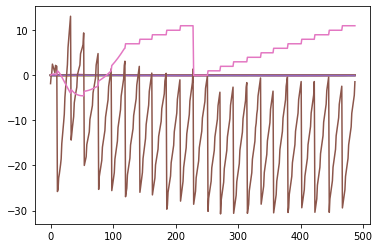

In [68]:
plt.plot(scaler.inverse_transform(test_y[:,0:n_features]) - scaler.inverse_transform(predict(train_y, len(test_y))[500:500+len(test_y)]))

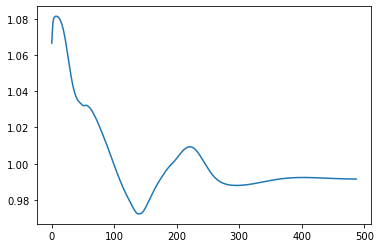

In [69]:
plt.plot(scaler.inverse_transform(predict(train_y, len(test_y)))[500:500+len(test_y),2])

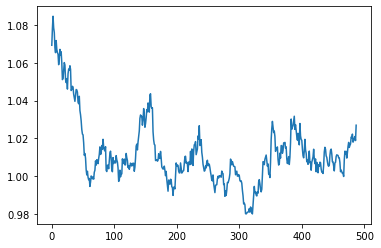

In [70]:
plt.plot(scaler.inverse_transform(test_y[:,0:n_features])[:,2])

In [71]:
predict(train_y, 10)[:500][-1]

array([0.81706524, 0.7310982 , 0.83199215, 0.92659616, 0.9002433 ,
       0.90268946, 0.6613941 , 0.32091522, 0.54248667, 0.71871114,
       0.80399084, 0.79502726, 0.9099939 , 0.8785498 , 0.8759854 ,
       0.40000004, 0.09090909], dtype=float32)

In [72]:
test_y[0][:n_features]

array([0.8183813 , 0.7244911 , 0.8648176 , 0.90996313, 0.9203243 ,
       0.9262829 , 0.6739063 , 0.30369568, 0.58720064, 0.7551248 ,
       0.8320441 , 0.81038046, 0.9291289 , 0.88591385, 0.8917711 ,
       0.43333337, 0.09090909], dtype=float32)

In [73]:
train_y[-1][n_features:]

array([], dtype=float32)

# SHARED LAYERS

In [78]:
new_data.head()

AUDUSD=X  CADUSD=X  CHFUSD=X  CNYUSD=X  DKKUSD=X  EURUSD=X  \
Date                                                                     
2016-02-01  0.706864  0.715676  0.976086  0.152297  0.145087  1.082591   
2016-02-02  0.711086  0.716846  0.980873  0.152244  0.146036  1.089728   
2016-02-03  0.702988  0.711238  0.981653  0.152212  0.146354  1.092204   
2016-02-04  0.715461  0.724942  0.994827  0.152277  0.148637  1.109102   
2016-02-05  0.719942  0.726998  1.006654  0.152560  0.150071  1.119996   

            GBPUSD=X  HKDUSD=X  JPYUSD=X  KZTUSD=X  NOKUSD=X  NZDUSD=X  \
Date                                                                     
2016-02-01  1.424603  0.128481  0.008241  0.002743  0.115135  0.646998   
2016-02-02  1.442793  0.128553  0.008275  0.002805  0.115201  0.654579   
2016-02-03  1.440922  0.128317  0.008343  0.002683  0.114683  0.652018   
2016-02-04  1.458576  0.128345  0.008466  0.002762  0.116773  0.664717   
2016-02-05  1.458109  0.128403  0.008557  0.002772  0.117701  0.672993   

            PLNUSD=X  RUBUSD=X  SEKUSD=X  day  month  
Date                                                  
2016-02-01  0.245228  0.013256  0.116426    1      2  
2016-02-02  0.247986  0.012943  0.117306    2      2  
2016-02-03  0.248004  0.012545  0.116964    3      2  
2016-02-04  0.251062  0.012999  0.118491    4      2  
2016-02-05  0.253291  0.013026  0.119067    5      2